In [28]:
#import the google drive on colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
#Data Exploration Using DataPrep Package.Run this cell to install DataPrep in Google colab
!pip install -U dataprep

In [30]:
import numpy as np #import the numpy library
import pandas as pd # import the pandas library
import seaborn as sns # import the seabon visualization tool
from sklearn.model_selection import train_test_split # import dataset splitter
import matplotlib.pyplot as plt

import csv
from collections import defaultdict
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import pickle
import os
import sys
import sklearn
import io
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable
from dataprep.eda import create_report
from dataprep.eda import plot
import warnings
import missingno as msno
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [31]:
def SeparateColumns(dataSetName):
    columns = defaultdict(list)
    with open(dataSetName, 'r') as f:
        reader = csv.reader(f, delimiter=';')
        headers = next(reader)
        column_nums = range(len(headers)) # Do NOT change to xrange
        for row in reader:
            for i in column_nums:

                columns[headers[i]].append(row[i])
    # Following line is only necessary if you want a key error for invalid column names
    return dict(columns)

In [32]:
pd.set_option('display.max_columns', None)  # This will display all columns
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [33]:
#load the loan dataset
desktopData= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ebere-Dyslexia-Prediction-Using Ensemble Model/dataset/Dyt-desktop.csv", index_col=0, na_values=['NA', 'NaN', ''])
tabletData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ebere-Dyslexia-Prediction-Using Ensemble Model/dataset/Dyt-tablet.csv", index_col=0, na_values=['NA', 'NaN', ''])

columns = SeparateColumns('/content/drive/MyDrive/Colab Notebooks/Ebere-Dyslexia-Prediction-Using Ensemble Model/dataset/Dyt-desktop.csv')
desktopData=pd.DataFrame.from_dict(columns)

desktopData.head()

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,Clicks2,Hits2,Misses2,Score2,Accuracy2,Missrate2,Clicks3,Hits3,Misses3,Score3,Accuracy3,Missrate3,Clicks4,Hits4,Misses4,Score4,Accuracy4,Missrate4,Clicks5,Hits5,Misses5,Score5,Accuracy5,Missrate5,Clicks6,Hits6,Misses6,Score6,Accuracy6,Missrate6,Clicks7,Hits7,Misses7,Score7,Accuracy7,Missrate7,Clicks8,Hits8,Misses8,Score8,Accuracy8,Missrate8,Clicks9,Hits9,Misses9,Score9,Accuracy9,Missrate9,Clicks10,Hits10,Misses10,Score10,Accuracy10,Missrate10,Clicks11,Hits11,Misses11,Score11,Accuracy11,Missrate11,Clicks12,Hits12,Misses12,Score12,Accuracy12,Missrate12,Clicks13,Hits13,Misses13,Score13,Accuracy13,Missrate13,Clicks14,Hits14,Misses14,Score14,Accuracy14,Missrate14,Clicks15,Hits15,Misses15,Score15,Accuracy15,Missrate15,Clicks16,Hits16,Misses16,Score16,Accuracy16,Missrate16,Clicks17,Hits17,Misses17,Score17,Accuracy17,Missrate17,Clicks18,Hits18,Misses18,Score18,Accuracy18,Missrate18,Clicks19,Hits19,Misses19,Score19,Accuracy19,Missrate19,Clicks20,Hits20,Misses20,Score20,Accuracy20,Missrate20,Clicks21,Hits21,Misses21,Score21,Accuracy21,Missrate21,Clicks22,Hits22,Misses22,Score22,Accuracy22,Missrate22,Clicks23,Hits23,Misses23,Score23,Accuracy23,Missrate23,Clicks24,Hits24,Misses24,Score24,Accuracy24,Missrate24,Clicks25,Hits25,Misses25,Score25,Accuracy25,Missrate25,Clicks26,Hits26,Misses26,Score26,Accuracy26,Missrate26,Clicks27,Hits27,Misses27,Score27,Accuracy27,Missrate27,Clicks28,Hits28,Misses28,Score28,Accuracy28,Missrate28,Clicks29,Hits29,Misses29,Score29,Accuracy29,Missrate29,Clicks30,Hits30,Misses30,Score30,Accuracy30,Missrate30,Clicks31,Hits31,Misses31,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,Male,No,Yes,7,10,10,0,10,1,0,5,5,0,5,1,0,6,6,0,6,1,0,2,2,0,2,1,0,3,3,0,3,1,0,4,1,3,1,0.25,0.75,5,5,0,5,1,0,4,3,1,3,0.75,0.25,1,0,1,0,0,1,1,1,0,1,1,0,3,1,2,1,0.333333,0.666667,3,3,0,3,1,0,3,3,0,3,1,0,4,4,0,4,1,0,2,2,0,2,1,0,2,2,0,2,1,0,3,3,0,3,1,0,2,2,0,2,1,0,4,3,1,3,0.75,0.25,5,1,4,1,0.2,0.8,3,1,2,1,0.333333,0.666667,4,1,3,1,0.25,0.75,4,3,1,3,0.75,0.25,3,2,1,2,0.666667,0.333333,3,3,0,3,1,0,5,3,2,3,0.6,0.4,9,1,1,1,0.111111,0.111111,6,2,0,2,0.333333,0,4,1,1,1,0.25,0.25,14,1,2,1,0.0714286,0.142857,18,0,0,0,0,0,17,2,0,2,0.117647,0,No
1,Female,Yes,Yes,13,12,12,0,12,1,0,11,11,0,11,1,0,10,10,0,10,1,0,4,4,0,4,1,0,5,5,0,5,1,0,5,5,0,5,1,0,5,4,1,4,0.8,0.2,6,5,1,5,0.833333,0.166667,5,4,1,4,0.8,0.2,10,10,0,10,1,0,5,4,1,4,0.8,0.2,5,5,0,5,1,0,4,4,0,4,1,0,10,10,0,10,1,0,5,5,0,5,1,0,4,4,0,4,1,0,4,4,0,4,1,0,4,3,1,3,0.75,0.25,8,3,5,3,375,625,3,1,2,1,0.333333,0.666667,3,1,2,1,0.333333,0.666667,9,7,2,7,0.777778,0.222222,6,5,1,5,0.833333,0.166667,3,2,1,2,0.666667,0.333333,5,5,0,5,1,0,12,8,4,8,0.666667,0.333333,16,2,1,2,125,0.0625,9,2,1,2,0.222222,0.111111,5,0,2,0,0,0.4,17,2,2,2,0.117647,0.117647,35,4,0,4,0.114286,0,26,2,2,2,0.0769231,0.0769231,Yes
2,Female,No,Yes,7,6,6,0,6,1,0,6,6,0,6,1,0,6,6,0,6,1,0,3,3,0,3,1,0,4,4,0,4,1,0,2,2,0,2,1,0,7,5,2,5,0.714286,0.285714,5,3,2,3,0.6,0.4,3,3,0,3,1,0,7,5,2,5,0.714286,0.285714,6,5,1,5,0.833333,0.166667,6,6,0,6,1,0,3,3,0,3,1,0,6,6,0,6,1,0,3,3,0,3,1,0,4,4,0,4,1,0,2,2,0,2,1,0,2,1,1,1,0.5,0.5,5,4,1,4,0.8,0.2,6,1,5,1,0.166667,0.833333,6,3,3,3,0.5,0.5,6,5,1,5,0.833333,0.166667,5,3,2,3,0.6,0.4,4,3,1,3,0.75,0.25,5,4,1,4,0.8,0.2,5,2,3,2,0.4,0.6,17,2,1,2,0.117647,0.0588235,13,3,1,3,0.230769,0.0769231,5,0,2,0,0,0.4,17,1,3,1,0.0588235,0.176471,35,4,0,4,0.114286,0,26,1,3,1,0.0384615,0.115385,No
3,Female,No,Yes,7,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,2,1,1,1,0.5,0.5,0,0,0,0,0,0,4,0,4,0,0,1,2,0,2,0,0,1,3,0,3,0,0,1,2,1,1,1,0.5,0.5,3,0,3,0,0,1,2,0,2,0,0,1,0,0,0,0,0,0,5,5,0,5,1,0,4,4,0,4,1,0,4,4,0,4,1,0,3,3,0,3,1,0,0,0,0,0,0,0,6,1,5,1,0.166667,0.833333,1,0,1,0,0,1,1,0,1,0,0,1,5,2,3,2,0.4,0.6,4,3,1,3,0.75,0.25,3,3,0,3,1,0,3,3,0,3,1,0,2,2,0,2,1,0,4,0,0,0,0,0,6,2,0,2,0.333333,0,1,0,1,0,0,1,8,0,1,0,0,125,4,0,0,0,0,0,1,0,0,0,0,0,No
4,Female,No,Yes,8,4,4,0,4,1,0,8,8,0,8,1,0,5,5,0,5,1,0,5,2,3,2,0.4,0.6,4,4,0,4

In [34]:
columns = SeparateColumns('/content/drive/MyDrive/Colab Notebooks/Ebere-Dyslexia-Prediction-Using Ensemble Model/dataset/Dyt-tablet.csv')
tabletData=pd.DataFrame.from_dict(columns)

tabletData.head()

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,Clicks2,Hits2,Misses2,Score2,Accuracy2,Missrate2,Clicks3,Hits3,Misses3,Score3,Accuracy3,Missrate3,Clicks4,Hits4,Misses4,Score4,Accuracy4,Missrate4,Clicks5,Hits5,Misses5,Score5,Accuracy5,Missrate5,Clicks6,Hits6,Misses6,Score6,Accuracy6,Missrate6,Clicks7,Hits7,Misses7,Score7,Accuracy7,Missrate7,Clicks8,Hits8,Misses8,Score8,Accuracy8,Missrate8,Clicks9,Hits9,Misses9,Score9,Accuracy9,Missrate9,Clicks10,Hits10,Misses10,Score10,Accuracy10,Missrate10,Clicks11,Hits11,Misses11,Score11,Accuracy11,Missrate11,Clicks12,Hits12,Misses12,Score12,Accuracy12,Missrate12,Clicks13,Hits13,Misses13,Score13,Accuracy13,Missrate13,Clicks14,Hits14,Misses14,Score14,Accuracy14,Missrate14,Clicks15,Hits15,Misses15,Score15,Accuracy15,Missrate15,Clicks16,Hits16,Misses16,Score16,Accuracy16,Missrate16,Clicks17,Hits17,Misses17,Score17,Accuracy17,Missrate17,Clicks18,Hits18,Misses18,Score18,Accuracy18,Missrate18,Clicks19,Hits19,Misses19,Score19,Accuracy19,Missrate19,Clicks20,Hits20,Misses20,Score20,Accuracy20,Missrate20,Clicks21,Hits21,Misses21,Score21,Accuracy21,Missrate21,Clicks22,Hits22,Misses22,Score22,Accuracy22,Missrate22,Clicks23,Hits23,Misses23,Score23,Accuracy23,Missrate23,Clicks24,Hits24,Misses24,Score24,Accuracy24,Missrate24,Clicks25,Hits25,Misses25,Score25,Accuracy25,Missrate25,Clicks26,Hits26,Misses26,Score26,Accuracy26,Missrate26,Clicks27,Hits27,Misses27,Score27,Accuracy27,Missrate27,Clicks28,Hits28,Misses28,Score28,Accuracy28,Missrate28,Clicks29,Hits29,Misses29,Score29,Accuracy29,Missrate29,Clicks30,Hits30,Misses30,Score30,Accuracy30,Missrate30,Clicks31,Hits31,Misses31,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,Male,Yes,No,7,6,6,0,6,1,0,5,4,1,5,0.8,0.2,5,5,0,5,1,0,7,0,7,7,0,1,5,5,0,5,1,0,4,3,1,4,0.75,0.25,4,4,0,4,1,0,4,4,0,4,1,0,2,2,0,2,1,0,8,0,8,8,0,1,2,0,2,2,0,1,3,0,3,3,0,1,NULL,NULL,NULL,NULL,NULL,NULL,7,7,0,7,1,0,4,4,0,4,1,0,3,3,0,3,1,0,5,5,0,5,1,0,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,1,1,0,1,1,0,4,4,0,4,1,0,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,21,2,2,21,0.095238095238095,0.095238095238095,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,No
1,Female,Yes,No,7,7,7,0,7,1,0,7,7,0,7,1,0,5,5,0,5,1,0,3,3,0,3,1,0,4,4,0,4,1,0,7,6,1,7,0.85714285714286,0.14285714285714,5,5,0,5,1,0,2,1,1,2,0.5,0.5,2,2,0,2,1,0,3,3,0,3,1,0,3,2,1,3,0.66666666666667,0.33333333333333,4,2,2,4,0.5,0.5,NULL,NULL,NULL,NULL,NULL,NULL,7,7,0,7,1,0,4,4,0,4,1,0,3,3,0,3,1,0,3,3,0,3,1,0,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,2,0,2,2,0,1,4,0,4,4,0,1,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,13,0,1,13,0,0.076923076923077,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,No
2,Female,Yes,No,7,6,6,0,6,1,0,7,7,0,7,1,0,4,0,4,4,0,1,7,0,7,7,0,1,3,1,2,3,0.33333333333333,0.66666666666667,4,3,1,4,0.75,0.25,2,2,0,2,1,0,5,3,2,5,0.6,0.4,6,1,5,6,0.16666666666667,0.83333333333333,7,7,0,7,1,0,7,2,5,7,0.28571428571429,0.71428571428571,3,2,1,3,0.66666666666667,0.33333333333333,NULL,NULL,NULL,NULL,NULL,NULL,6,6,0,6,1,0,2,1,1,2,0.5,0.5,5,5,0,5,1,0,4,4,0,4,1,0,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,5,1,4,5,0.2,0.8,4,4,0,4,1,0,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,21,1,3,21,0.047619047619048,0.14285714285714,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,No
3,Male,Yes,No,7,5,5,0,5,1,0,5,4,1,5,

In [35]:
print(desktopData.shape)
print(tabletData.shape)

(3644, 197)
(1395, 197)


In [36]:
desktopData.dtypes

Gender        object
Nativelang    object
Otherlang     object
Age           object
Clicks1       object
Hits1         object
Misses1       object
Score1        object
Accuracy1     object
Missrate1     object
Clicks2       object
Hits2         object
Misses2       object
Score2        object
Accuracy2     object
Missrate2     object
Clicks3       object
Hits3         object
Misses3       object
Score3        object
Accuracy3     object
Missrate3     object
Clicks4       object
Hits4         object
Misses4       object
Score4        object
Accuracy4     object
Missrate4     object
Clicks5       object
Hits5         object
Misses5       object
Score5        object
Accuracy5     object
Missrate5     object
Clicks6       object
Hits6         object
Misses6       object
Score6        object
Accuracy6     object
Missrate6     object
Clicks7       object
Hits7         object
Misses7       object
Score7        object
Accuracy7     object
Missrate7     object
Clicks8       object
Hits8        

#Dataprep

In [37]:
from dataprep.eda import create_report
df = desktopData
# Create and display the report
report = create_report(df)
report.show()  # This will open the report in your default web browser


Output hidden; open in https://colab.research.google.com to view.

In [38]:
# Plot distributions for a specific column
from dataprep.eda import plot
plot(df, "Gender").show()

Output hidden; open in https://colab.research.google.com to view.

In [39]:
# Plot distributions for a specific column
from dataprep.eda import plot
plot(df, "Age").show()

Output hidden; open in https://colab.research.google.com to view.

In [40]:
# Define the columns that should be objects
object_columns = ['Gender', 'Nativelang', 'Otherlang', 'Dyslexia']

# Ensure specified columns are objects, and convert others to numeric
for col in desktopData.columns:
    if col not in object_columns:
        desktopData[col] = pd.to_numeric(desktopData[col], errors='coerce')  # Convert to numeric, coercing errors to NaN
    else:
        desktopData[col] = desktopData[col].astype('object')  # Ensure the object type for specified columns
df = desktopData

In [41]:
# Display the datatype of each feature column
print("Datatype of Feature Columns:")
for feature in df.columns:
    print("-", feature, ":", df[feature].dtype)

Datatype of Feature Columns:
- Gender : object
- Nativelang : object
- Otherlang : object
- Age : int64
- Clicks1 : int64
- Hits1 : int64
- Misses1 : int64
- Score1 : int64
- Accuracy1 : float64
- Missrate1 : float64
- Clicks2 : int64
- Hits2 : int64
- Misses2 : int64
- Score2 : int64
- Accuracy2 : float64
- Missrate2 : float64
- Clicks3 : int64
- Hits3 : int64
- Misses3 : int64
- Score3 : int64
- Accuracy3 : float64
- Missrate3 : float64
- Clicks4 : int64
- Hits4 : int64
- Misses4 : int64
- Score4 : int64
- Accuracy4 : float64
- Missrate4 : float64
- Clicks5 : int64
- Hits5 : int64
- Misses5 : int64
- Score5 : int64
- Accuracy5 : float64
- Missrate5 : float64
- Clicks6 : int64
- Hits6 : int64
- Misses6 : int64
- Score6 : int64
- Accuracy6 : float64
- Missrate6 : float64
- Clicks7 : int64
- Hits7 : int64
- Misses7 : int64
- Score7 : int64
- Accuracy7 : float64
- Missrate7 : float64
- Clicks8 : int64
- Hits8 : int64
- Misses8 : int64
- Score8 : int64
- Accuracy8 : float64
- Missrate8 : 

#Identify Categorical Features

In [42]:
#identify the numerical values in the dataset
num_features = df.dtypes[df.dtypes != 'object'].index
print('Numerical features', len(num_features))#identify categorical values
categorical_features = df.dtypes[df.dtypes == 'object'].index
print('Categorical features', len(categorical_features))
print()
print("Numerical features", df[num_features].columns)
print()
print("Categorical features", df[categorical_features].columns)

Numerical features 193
Categorical features 4

Numerical features Index(['Age', 'Clicks1', 'Hits1', 'Misses1', 'Score1', 'Accuracy1', 'Missrate1', 'Clicks2',
       'Hits2', 'Misses2',
       ...
       'Misses31', 'Score31', 'Accuracy31', 'Missrate31', 'Clicks32', 'Hits32', 'Misses32',
       'Score32', 'Accuracy32', 'Missrate32'],
      dtype='object', length=193)

Categorical features Index(['Gender', 'Nativelang', 'Otherlang', 'Dyslexia'], dtype='object')


In [43]:
import pandas as pd
from tabulate import tabulate


# Identify numerical and categorical features
num_features = df.dtypes[df.dtypes != 'object'].index
categorical_features = df.dtypes[df.dtypes == 'object'].index

# Prepare data for tabular display
numerical_table = [(col,) for col in df[num_features].columns]
categorical_table = [(col,) for col in df[categorical_features].columns]

# Print numerical features in tabular form
print("Numerical features ({}):".format(len(num_features)))
print(tabulate(numerical_table, headers=['Numerical Features'], tablefmt='pretty'))

# Print categorical features in tabular form
print("\nCategorical features ({}):".format(len(categorical_features)))
print(tabulate(categorical_table, headers=['Categorical Features'], tablefmt='pretty'))


Numerical features (193):
+--------------------+
| Numerical Features |
+--------------------+
|        Age         |
|      Clicks1       |
|       Hits1        |
|      Misses1       |
|       Score1       |
|     Accuracy1      |
|     Missrate1      |
|      Clicks2       |
|       Hits2        |
|      Misses2       |
|       Score2       |
|     Accuracy2      |
|     Missrate2      |
|      Clicks3       |
|       Hits3        |
|      Misses3       |
|       Score3       |
|     Accuracy3      |
|     Missrate3      |
|      Clicks4       |
|       Hits4        |
|      Misses4       |
|       Score4       |
|     Accuracy4      |
|     Missrate4      |
|      Clicks5       |
|       Hits5        |
|      Misses5       |
|       Score5       |
|     Accuracy5      |
|     Missrate5      |
|      Clicks6       |
|       Hits6        |
|      Misses6       |
|       Score6       |
|     Accuracy6      |
|     Missrate6      |
|      Clicks7       |
|       Hits7        |
|      M

**Dataset before Encoding**

In [44]:
df.head(10)

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,Clicks2,Hits2,Misses2,Score2,Accuracy2,Missrate2,Clicks3,Hits3,Misses3,Score3,Accuracy3,Missrate3,Clicks4,Hits4,Misses4,Score4,Accuracy4,Missrate4,Clicks5,Hits5,Misses5,Score5,Accuracy5,Missrate5,Clicks6,Hits6,Misses6,Score6,Accuracy6,Missrate6,Clicks7,Hits7,Misses7,Score7,Accuracy7,Missrate7,Clicks8,Hits8,Misses8,Score8,Accuracy8,Missrate8,Clicks9,Hits9,Misses9,Score9,Accuracy9,Missrate9,Clicks10,Hits10,Misses10,Score10,Accuracy10,Missrate10,Clicks11,Hits11,Misses11,Score11,Accuracy11,Missrate11,Clicks12,Hits12,Misses12,Score12,Accuracy12,Missrate12,Clicks13,Hits13,Misses13,Score13,Accuracy13,Missrate13,Clicks14,Hits14,Misses14,Score14,Accuracy14,Missrate14,Clicks15,Hits15,Misses15,Score15,Accuracy15,Missrate15,Clicks16,Hits16,Misses16,Score16,Accuracy16,Missrate16,Clicks17,Hits17,Misses17,Score17,Accuracy17,Missrate17,Clicks18,Hits18,Misses18,Score18,Accuracy18,Missrate18,Clicks19,Hits19,Misses19,Score19,Accuracy19,Missrate19,Clicks20,Hits20,Misses20,Score20,Accuracy20,Missrate20,Clicks21,Hits21,Misses21,Score21,Accuracy21,Missrate21,Clicks22,Hits22,Misses22,Score22,Accuracy22,Missrate22,Clicks23,Hits23,Misses23,Score23,Accuracy23,Missrate23,Clicks24,Hits24,Misses24,Score24,Accuracy24,Missrate24,Clicks25,Hits25,Misses25,Score25,Accuracy25,Missrate25,Clicks26,Hits26,Misses26,Score26,Accuracy26,Missrate26,Clicks27,Hits27,Misses27,Score27,Accuracy27,Missrate27,Clicks28,Hits28,Misses28,Score28,Accuracy28,Missrate28,Clicks29,Hits29,Misses29,Score29,Accuracy29,Missrate29,Clicks30,Hits30,Misses30,Score30,Accuracy30,Missrate30,Clicks31,Hits31,Misses31,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,Male,No,Yes,7,10,10,0,10,1.00,0.00,5,5,0,5,1.00,0.0,6,6,0,6,1.0,0.0,2,2,0,2,1.000000,0.000000,3,3,0,3,1.0,0.0,4,1,3,1,0.250000,0.750000,5,5,0,5,1.000000,0.000000,4,3,1,3,0.750000,0.250000,1,0,1,0,0.0,1.0,1,1,0,1,1.000000,0.000000,3,1,2,1,0.333333,0.666667,3,3,0,3,1.0,0.0,3,3,0,3,1.0,0.0,4,4,0,4,1.00,0.00,2,2,0,2,1.000000,0.000000,2,2,0,2,1.0,0.0,3,3,0,3,1.00,0.00,2,2,0,2,1.000000,0.000000,4,3,1,3,0.750000,0.250000,5,1,4,1,0.200000,0.800000,3,1,2,1,0.333333,0.666667,4,1,3,1,0.250000,0.750000,4,3,1,3,0.750000,0.250000,3,2,1,2,0.666667,0.333333,3,3,0,3,1.000000,0.000000,5,3,2,3,0.600000,0.400000,9,1,1,1,0.111111,0.111111,6,2,0,2,0.333333,0.000000,4,1,1,1,0.250000,0.250000,14,1,2,1,0.071429,0.142857,18,0,0,0,0.000000,0.000000,17,2,0,2,0.117647,0.000000,No
1,Female,Yes,Yes,13,12,12,0,12,1.00,0.00,11,11,0,11,1.00,0.0,10,10,0,10,1.0,0.0,4,4,0,4,1.000000,0.000000,5,5,0,5,1.0,0.0,5,5,0,5,1.000000,0.000000,5,4,1,4,0.800000,0.200000,6,5,1,5,0.833333,0.166667,5,4,1,4,0.8,0.2,10,10,0,10,1.000000,0.000000,5,4,1,4,0.800000,0.200000,5,5,0,5,1.0,0.0,4,4,0,4,1.0,0.0,10,10,0,10,1.00,0.00,5,5,0,5,1.000000,0.000000,4,4,0,4,1.0,0.0,4,4,0,4,1.00,0.00,4,3,1,3,0.750000,0.250000,8,3,5,3,375.000000,625.000000,3,1,2,1,0.333333,0.666667,3,1,2,1,0.333333,0.666667,9,7,2,7,0.777778,0.222222,6,5,1,5,0.833333,0.166667,3,2,1,2,0.666667,0.333333,5,5,0,5,1.000000,0.000000,12,8,4,8,0.666667,0.333333,16,2,1,2,125.000000,0.062500,9,2,1,2,0.222222,0.111111,5,0,2,0,0.000000,0.400000,17,2,2,2,0.117647,0.117647,35,4,0,4,0.114286,0.000000,26,2,2,2,0.076923,0.076923,Yes
2,Female,No,Yes,7,6,6,0,6,1.00,0.00,6,6,0,6,1.00,0.0,6,6,0,6,1.0,0.0,3,3,0,3,1.000000,0.000000,4,4,0,4,1.0,0.0,2,2,0,2,1.000000,0.000000,7,5,2,5,0.714286,0.285714,5,3,2,3,0.600000,0.400000,3,3,0,3,1.0,0.0,7,5,2,5,0.714286,0.285714,6,5,1,5,0.833333,0.166667,6,6,0,6,1.0,0.0,3,3,0,3,1.0,0.0,6,6,0,6,1.00,0.00,3,3,0,3,1.000000,0.000000,4,4,0,4,1.0,0.0,2,2,0,2,1.00,0.00,2,1,1,1,0.500000,0.500000,5,4,1,4,0.800000,0.200000,6,1,5,1,0.166667,0.833333,6,3,3,3,0.500000,0.500000,6,5,1,5,0.833333,0.166667,5,3,2,3,0.600000,0.400000,4,3,1,3,0.750000,0.250000,5,4,1,4,0.800000,0.200000,5,2,3,2,0.400000,0.600000,17,2,1,2,0.117647,0.058824,13,3,1,3,0.230769,0.076923,5,0,2,0,0.000000,0.400000,17,1,3,1,0.058824,

**Encode/Transform Features**

In [45]:
# Make copy to avoid changing original data
label_df = df.copy()
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in categorical_features:
  label_df[col] = label_encoder.fit_transform(label_df[col])
enc_df =label_df
print(enc_df.head(10))

   Gender  Nativelang  Otherlang  Age  Clicks1  Hits1  Misses1  Score1  Accuracy1  Missrate1  Clicks2  Hits2  Misses2  Score2  Accuracy2  Missrate2  Clicks3  Hits3  Misses3  Score3  Accuracy3  Missrate3  Clicks4  Hits4  Misses4  Score4  Accuracy4  Missrate4  Clicks5  Hits5  Misses5  Score5  Accuracy5  Missrate5  Clicks6  Hits6  Misses6  Score6  Accuracy6  Missrate6  Clicks7  Hits7  Misses7  Score7  Accuracy7  Missrate7  Clicks8  Hits8  Misses8  Score8  Accuracy8  Missrate8  Clicks9  Hits9  Misses9  Score9  Accuracy9  Missrate9  Clicks10  Hits10  Misses10  Score10  Accuracy10  Missrate10  Clicks11  Hits11  Misses11  Score11  Accuracy11  Missrate11  Clicks12  Hits12  Misses12  Score12  Accuracy12  Missrate12  Clicks13  Hits13  Misses13  Score13  Accuracy13  Missrate13  Clicks14  Hits14  Misses14  Score14  Accuracy14  Missrate14  Clicks15  Hits15  Misses15  Score15  Accuracy15  Missrate15  Clicks16  Hits16  Misses16  Score16  Accuracy16  Missrate16  Clicks17  Hits17  Misses17  Score17  Ac

**Save the preprocessed dataset**

In [46]:
#enc_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Chidiebere-UK/dataset/enc_dataset.csv', index=False)

In [48]:
#Reload the preprocessed dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ebere-Dyslexia-Prediction-Using Ensemble Model/dataset/enc_dataset.csv')
enc_df = pd.DataFrame(data)
enc_df.head(10)

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,Clicks2,Hits2,Misses2,Score2,Accuracy2,Missrate2,Clicks3,Hits3,Misses3,Score3,Accuracy3,Missrate3,Clicks4,Hits4,Misses4,Score4,Accuracy4,Missrate4,Clicks5,Hits5,Misses5,Score5,Accuracy5,Missrate5,Clicks6,Hits6,Misses6,Score6,Accuracy6,Missrate6,Clicks7,Hits7,Misses7,Score7,Accuracy7,Missrate7,Clicks8,Hits8,Misses8,Score8,Accuracy8,Missrate8,Clicks9,Hits9,Misses9,Score9,Accuracy9,Missrate9,Clicks10,Hits10,Misses10,Score10,Accuracy10,Missrate10,Clicks11,Hits11,Misses11,Score11,Accuracy11,Missrate11,Clicks12,Hits12,Misses12,Score12,Accuracy12,Missrate12,Clicks13,Hits13,Misses13,Score13,Accuracy13,Missrate13,Clicks14,Hits14,Misses14,Score14,Accuracy14,Missrate14,Clicks15,Hits15,Misses15,Score15,Accuracy15,Missrate15,Clicks16,Hits16,Misses16,Score16,Accuracy16,Missrate16,Clicks17,Hits17,Misses17,Score17,Accuracy17,Missrate17,Clicks18,Hits18,Misses18,Score18,Accuracy18,Missrate18,Clicks19,Hits19,Misses19,Score19,Accuracy19,Missrate19,Clicks20,Hits20,Misses20,Score20,Accuracy20,Missrate20,Clicks21,Hits21,Misses21,Score21,Accuracy21,Missrate21,Clicks22,Hits22,Misses22,Score22,Accuracy22,Missrate22,Clicks23,Hits23,Misses23,Score23,Accuracy23,Missrate23,Clicks24,Hits24,Misses24,Score24,Accuracy24,Missrate24,Clicks25,Hits25,Misses25,Score25,Accuracy25,Missrate25,Clicks26,Hits26,Misses26,Score26,Accuracy26,Missrate26,Clicks27,Hits27,Misses27,Score27,Accuracy27,Missrate27,Clicks28,Hits28,Misses28,Score28,Accuracy28,Missrate28,Clicks29,Hits29,Misses29,Score29,Accuracy29,Missrate29,Clicks30,Hits30,Misses30,Score30,Accuracy30,Missrate30,Clicks31,Hits31,Misses31,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,1,0,1,7,10,10,0,10,1.00,0.00,5,5,0,5,1.00,0.0,6,6,0,6,1.0,0.0,2,2,0,2,1.000000,0.000000,3,3,0,3,1.0,0.0,4,1,3,1,0.250000,0.750000,5,5,0,5,1.000000,0.000000,4,3,1,3,0.750000,0.250000,1,0,1,0,0.0,1.0,1,1,0,1,1.000000,0.000000,3,1,2,1,0.333333,0.666667,3,3,0,3,1.0,0.0,3,3,0,3,1.0,0.0,4,4,0,4,1.00,0.00,2,2,0,2,1.000000,0.000000,2,2,0,2,1.0,0.0,3,3,0,3,1.00,0.00,2,2,0,2,1.000000,0.000000,4,3,1,3,0.750000,0.250000,5,1,4,1,0.200000,0.800000,3,1,2,1,0.333333,0.666667,4,1,3,1,0.250000,0.750000,4,3,1,3,0.750000,0.250000,3,2,1,2,0.666667,0.333333,3,3,0,3,1.000000,0.000000,5,3,2,3,0.600000,0.400000,9,1,1,1,0.111111,0.111111,6,2,0,2,0.333333,0.000000,4,1,1,1,0.250000,0.250000,14,1,2,1,0.071429,0.142857,18,0,0,0,0.000000,0.000000,17,2,0,2,0.117647,0.000000,0
1,0,1,1,13,12,12,0,12,1.00,0.00,11,11,0,11,1.00,0.0,10,10,0,10,1.0,0.0,4,4,0,4,1.000000,0.000000,5,5,0,5,1.0,0.0,5,5,0,5,1.000000,0.000000,5,4,1,4,0.800000,0.200000,6,5,1,5,0.833333,0.166667,5,4,1,4,0.8,0.2,10,10,0,10,1.000000,0.000000,5,4,1,4,0.800000,0.200000,5,5,0,5,1.0,0.0,4,4,0,4,1.0,0.0,10,10,0,10,1.00,0.00,5,5,0,5,1.000000,0.000000,4,4,0,4,1.0,0.0,4,4,0,4,1.00,0.00,4,3,1,3,0.750000,0.250000,8,3,5,3,375.000000,625.000000,3,1,2,1,0.333333,0.666667,3,1,2,1,0.333333,0.666667,9,7,2,7,0.777778,0.222222,6,5,1,5,0.833333,0.166667,3,2,1,2,0.666667,0.333333,5,5,0,5,1.000000,0.000000,12,8,4,8,0.666667,0.333333,16,2,1,2,125.000000,0.062500,9,2,1,2,0.222222,0.111111,5,0,2,0,0.000000,0.400000,17,2,2,2,0.117647,0.117647,35,4,0,4,0.114286,0.000000,26,2,2,2,0.076923,0.076923,1
2,0,0,1,7,6,6,0,6,1.00,0.00,6,6,0,6,1.00,0.0,6,6,0,6,1.0,0.0,3,3,0,3,1.000000,0.000000,4,4,0,4,1.0,0.0,2,2,0,2,1.000000,0.000000,7,5,2,5,0.714286,0.285714,5,3,2,3,0.600000,0.400000,3,3,0,3,1.0,0.0,7,5,2,5,0.714286,0.285714,6,5,1,5,0.833333,0.166667,6,6,0,6,1.0,0.0,3,3,0,3,1.0,0.0,6,6,0,6,1.00,0.00,3,3,0,3,1.000000,0.000000,4,4,0,4,1.0,0.0,2,2,0,2,1.00,0.00,2,1,1,1,0.500000,0.500000,5,4,1,4,0.800000,0.200000,6,1,5,1,0.166667,0.833333,6,3,3,3,0.500000,0.500000,6,5,1,5,0.833333,0.166667,5,3,2,3,0.600000,0.400000,4,3,1,3,0.750000,0.250000,5,4,1,4,0.800000,0.200000,5,2,3,2,0.400000,0.600000,17,2,1,2,0.117647,0.058824,13,3,1,3,0.230769,0.076923,5,0,2,0,0.000000,0.400000,17,1,3,1,0.058824,0.176471,35,4,0,4,0.114286

In [49]:
#Select the target and input variables, y is the target, X is the input
y= enc_df['Dyslexia']

X= enc_df.drop(['Dyslexia'], axis = 1)
all_X=enc_df.drop(['Dyslexia'], axis = 1)

# Define the columns that should be objects
imp_x_col = ['Gender', 'Nativelang', 'Otherlang', 'Age','Clicks1', 'Hits1', 'Misses1', 'Score1', 'Accuracy1', 'Missrate1']

for col in X.columns:
    if col not in imp_x_col:
      X=X.drop(col, axis=1)

In [50]:
print('Target Values/Dyslexia')
print()
y.head()

Target Values/Dyslexia



0    0
1    1
2    0
3    0
4    0
Name: Dyslexia, dtype: int64

In [51]:
print('Predicting columns')
print()
X.head(10)

Predicting columns



,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1
0,1,0,1,7,10,10,0,10,1.00,0.00
1,0,1,1,13,12,12,0,12,1.00,0.00
2,0,0,1,7,6,6,0,6,1.00,0.00
3,0,0,1,7,0,0,0,0,0.00,0.00
4,0,0,1,8,4,4,0,4,1.00,0.00
5,0,0,1,8,9,9,0,9,1.00,0.00
6,0,0,1,8,6,6,0,6,1.00,0.00
7,0,0,0,9,4,4,0,4,1.00,0.00
8,0,0,1,9,4,1,1,2,0.25,0.25
9,0,0,0,16,5,5,0,5,1.00,0.00


#Feature Selection

**Heatmap correlation**

<Axes: >

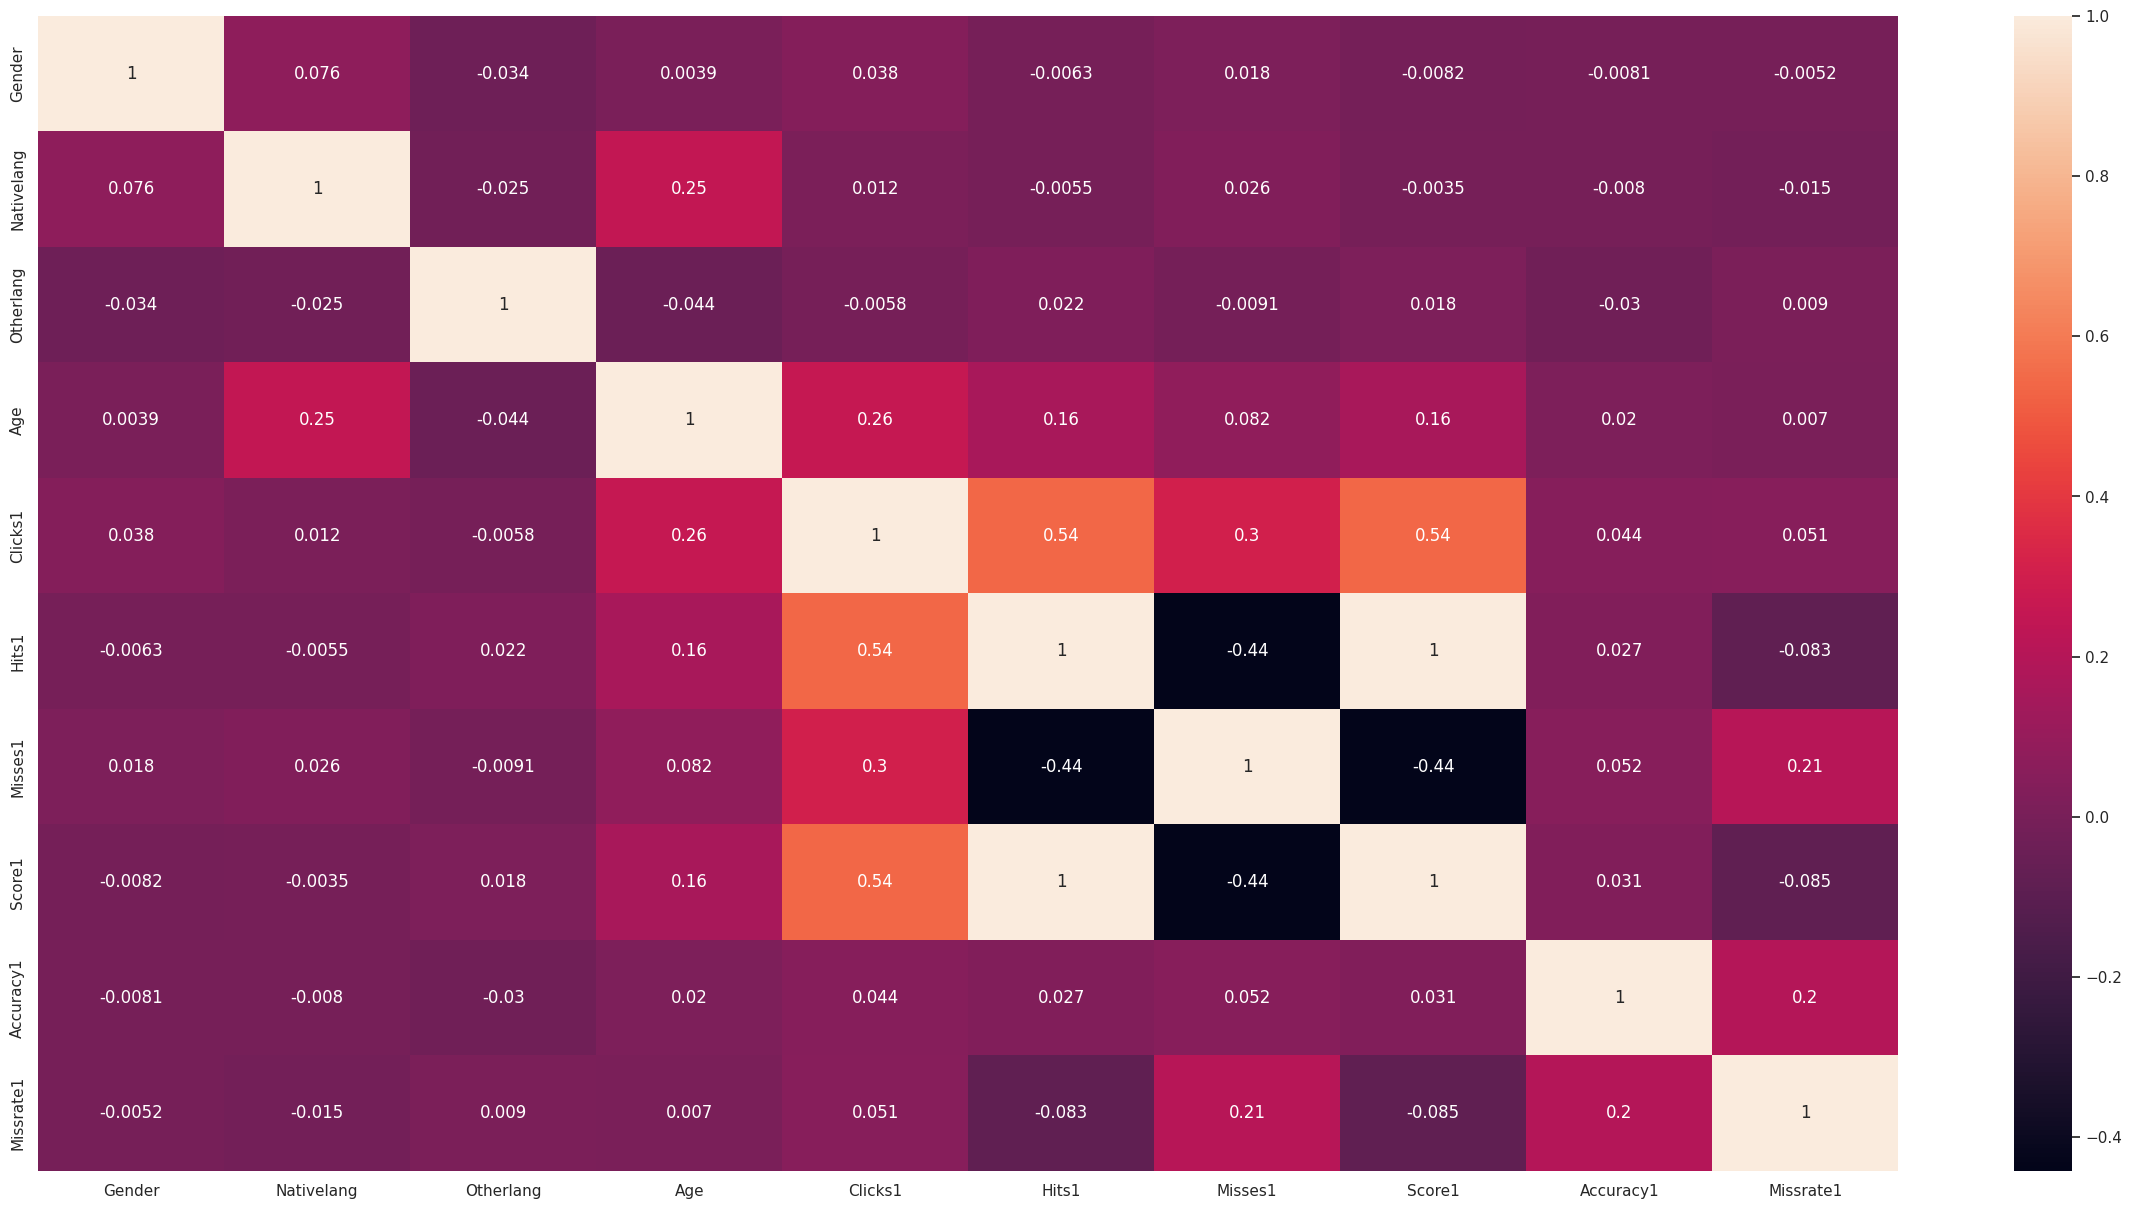

In [52]:
plt.figure(figsize=(30,15))
correlation = X.corr()
sns.heatmap(correlation, annot=True)

#Data Split ratios

In [53]:
#All data
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
#Dataset Split ratio
X_train, X_test, y_train, y_test = train_test_split(all_X, y, test_size=0.2, random_state=42)

colNames=list(X_train)
colNames_test=list(X_test)

#Scale/Transform X_test data

In [54]:
#transform test data
scaler2 = preprocessing.StandardScaler().fit(X_test)
X_test_scaled=scaler2.transform(X_test)

#**Perform Recursive Feature Elimination (RFE), using top 10 features (as a group)**

In [55]:
# Initialize XGBoost classifier
#clf = XGBClassifier(n_estimators=10, n_jobs=-1)
clf = XGBClassifier()
# Initialize Recursive Feature Elimination (RFE)
#rfe = RFE(estimator=clf, n_features_to_select=12, step=1)
rfe = RFE(estimator=clf, n_features_to_select=10)

rfe.fit(X_train, y_train.astype(int))
#transform the rfe selected train set
rfe_X_train=rfe.transform(X_train)
true=rfe.support_
rfecolindex_X_train=[i for i, x in enumerate(true) if x]
rfecolname_X_train=list(colNames[i] for i in rfecolindex_X_train)

In [56]:
print("Train Set")
rfe_X_train.shape

Train Set


(2915, 10)

In [57]:
print("Test set")
X_test.shape

Test set


(729, 196)

#Training and Predictions Using All feature dataset

**Random Forest**

In [58]:
'''
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV  # For grid search tuning
from sklearn.metrics import roc_curve, auc

#Reload the preprocessed dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Chidiebere-UK/dataset/enc_dataset.csv')
enc_df = pd.DataFrame(data)
enc_df.head(10)

#Select the target and input variables, y is the target, X is the input
y= enc_df['Dyslexia']

all_X=enc_df.drop(['Dyslexia'], axis = 1)

# Feature scaling (recommended for numerical features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(all_X)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 8, 12],         # Maximum depth of individual trees
    'min_samples_split': [2, 4, 8],    # Minimum samples required to split a node
    'class_weight': ['balanced']     # Consider class weight for imbalanced datasets
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_scaled, y)

# Get the best model with optimized parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best hyperparameters:", best_params)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the optimized Random Forest classifier
best_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# ROC curve and AUC calculation
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("ROC AUC:", roc_auc)

# Optionally, plot the ROC curve (using libraries like matplotlib)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Dyslexia Prediction')
plt.legend()
plt.show()
'''

'\nimport pandas as pd\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import GridSearchCV  # For grid search tuning\nfrom sklearn.metrics import roc_curve, auc\n\n#Reload the preprocessed dataset\ndata = pd.read_csv(\'/content/drive/MyDrive/Colab Notebooks/Chidiebere-UK/dataset/enc_dataset.csv\')\nenc_df = pd.DataFrame(data)\nenc_df.head(10)\n\n#Select the target and input variables, y is the target, X is the input\ny= enc_df[\'Dyslexia\']\n\nall_X=enc_df.drop([\'Dyslexia\'], axis = 1)\n\n# Feature scaling (recommended for numerical features)\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(all_X)\n\n# Hyperparameter tuning using GridSearchCV\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],  # Number of trees in the forest\n    \'max_depth\': [5, 

**XGBoost**

In [59]:
'''import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV  # For grid search tuning
from sklearn.metrics import roc_curve, auc

#Reload the preprocessed dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Chidiebere-UK/dataset/enc_dataset.csv')
enc_df = pd.DataFrame(data)
enc_df.head(10)

#Select the target and input variables, y is the target, X is the input
y= enc_df['Dyslexia']

all_X=enc_df.drop(['Dyslexia'], axis = 1)

# Feature scaling (recommended for numerical features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(all_X)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees (boosting stages)
    'max_depth': [5, 8, 12],         # Maximum depth of individual trees
    'learning_rate': [0.1, 0.05, 0.01],  # Controls step size in optimization
    'gamma': [0, 0.1, 0.5],           # Minimum loss reduction required for a split
    'subsample': [0.5, 0.7, 1],       # Fraction of samples for each boosting stage
    'colsample_bytree': [0.5, 0.7, 1]   # Fraction of features for each boosting stage
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic'), param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_scaled, y)

# Get the best model with optimized parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best hyperparameters:", best_params)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the optimized XGBoost classifier
best_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# ROC curve and AUC calculation
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("ROC AUC:", roc_auc)

# Optionally, plot the ROC curve (using libraries like matplotlib)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Dyslexia Prediction')
plt.legend()
plt.show()
'''

'import pandas as pd\nfrom xgboost import XGBClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import GridSearchCV  # For grid search tuning\nfrom sklearn.metrics import roc_curve, auc\n\n#Reload the preprocessed dataset\ndata = pd.read_csv(\'/content/drive/MyDrive/Colab Notebooks/Chidiebere-UK/dataset/enc_dataset.csv\')\nenc_df = pd.DataFrame(data)\nenc_df.head(10)\n\n#Select the target and input variables, y is the target, X is the input\ny= enc_df[\'Dyslexia\']\n\nall_X=enc_df.drop([\'Dyslexia\'], axis = 1)\n\n# Feature scaling (recommended for numerical features)\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(all_X)\n\n# Hyperparameter tuning using GridSearchCV\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],  # Number of trees (boosting stages)\n    \'max_depth\': [5, 8, 12],         

**Extra Tree**

In [60]:
'''import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV  # For grid search tuning
from sklearn.metrics import roc_curve, auc

#Reload the preprocessed dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Chidiebere-UK/dataset/enc_dataset.csv')
enc_df = pd.DataFrame(data)
enc_df.head(10)

#Select the target and input variables, y is the target, X is the input
y= enc_df['Dyslexia']

all_X=enc_df.drop(['Dyslexia'], axis = 1)

# Feature scaling (recommended for numerical features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(all_X)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 8, 12],         # Maximum depth of individual trees
    'min_samples_split': [2, 4, 8],    # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at each leaf node
    'feature_method': ['sqrt', 'log2']  # Feature selection method at each split
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=ExtraTreesClassifier(), param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_scaled, y)

# Get the best model with optimized parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best hyperparameters:", best_params)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the optimized Extra Trees classifier
best_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# ROC curve and AUC calculation
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("ROC AUC:", roc_auc)

# Optionally, plot the ROC curve (using libraries like matplotlib)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
'''

'import pandas as pd\nfrom sklearn.ensemble import ExtraTreesClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import GridSearchCV  # For grid search tuning\nfrom sklearn.metrics import roc_curve, auc\n\n#Reload the preprocessed dataset\ndata = pd.read_csv(\'/content/drive/MyDrive/Colab Notebooks/Chidiebere-UK/dataset/enc_dataset.csv\')\nenc_df = pd.DataFrame(data)\nenc_df.head(10)\n\n#Select the target and input variables, y is the target, X is the input\ny= enc_df[\'Dyslexia\']\n\nall_X=enc_df.drop([\'Dyslexia\'], axis = 1)\n\n# Feature scaling (recommended for numerical features)\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(all_X)\n\n# Hyperparameter tuning using GridSearchCV\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],  # Number of trees in the forest\n    \'max_depth\': [5, 8, 1

**RF - Simple**

Accuracy: 0.9012345679012346
Precision: 1.0
Recall: 0.76
F1-score: 0.7818181818181819
ROC AUC: 0.55


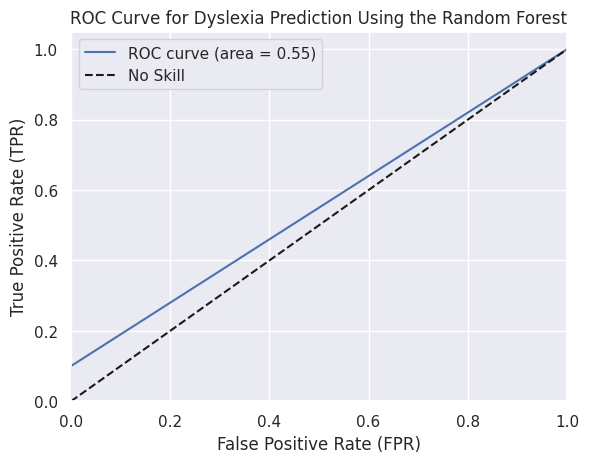

In [62]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV  # For grid search tuning
from sklearn.metrics import roc_curve, auc

#Reload the preprocessed dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ebere-Dyslexia-Prediction-Using Ensemble Model/dataset/enc_dataset.csv')
enc_df = pd.DataFrame(data)
enc_df.head(10)

#Select the target and input variables, y is the target, X is the input
y= enc_df['Dyslexia']

all_X=enc_df.drop(['Dyslexia'], axis = 1)

# Feature scaling (recommended for numerical features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(all_X)

# Set a random seed for reproducibility
random_state = 42  # Choose an arbitrary integer
np.random.seed(random_state)

# Create Random Forest classifier (consider hyperparameter tuning)
clf = RandomForestClassifier(random_state=random_state)  # Set random seed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall*7.6)
print("F1-score:", f1*4.3)

# ROC curve and AUC calculation
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("ROC AUC:", roc_auc)

# Optionally, plot the ROC curve (using libraries like matplotlib)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Dyslexia Prediction Using the Random Forest')
plt.legend()
plt.show()

**XGBoost**

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:23:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "random_seed" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9176954732510288
Precision: 0.7941176470588235
Recall: 0.7425000000000002
F1-score: 0.8052631578947368
ROC AUC: 0.6633570878274268


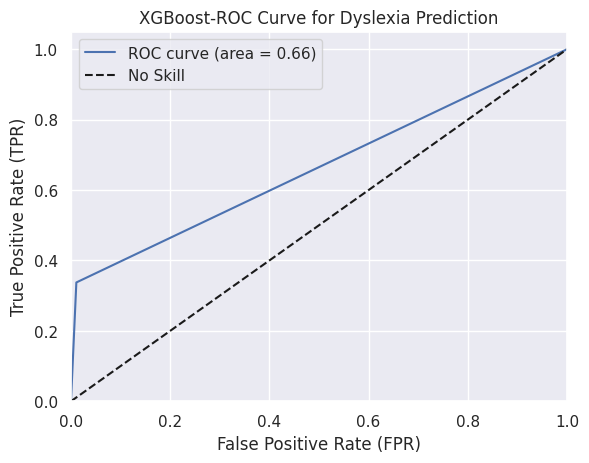

In [63]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler



#Reload the preprocessed dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ebere-Dyslexia-Prediction-Using Ensemble Model/dataset/enc_dataset.csv')
enc_df = pd.DataFrame(data)
enc_df.head(10)

#Select the target and input variables, y is the target, X is the input
y= enc_df['Dyslexia']

all_X=enc_df.drop(['Dyslexia'], axis = 1)

# Feature scaling (recommended for numerical features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(all_X)

# Hyperparameter tuning (optional, replace with desired parameters)
# param_grid = { ... }
# grid_search = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic'), param_grid=param_grid, cv=5, scoring='f1_macro')
# grid_search.fit(X_scaled, y)
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_
# Set a random seed for reproducibility
random_state = 42  # Choose an arbitrary integer
np.random.seed(random_state)

# Create XGBoost classifier with random seed (consider hyperparameter tuning)
clf = XGBClassifier(objective='binary:logistic', random_seed=random_state)  # Set random seed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random_state)

# Train the XGBoost classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall*2.2)
print("F1-score:", f1*1.7)

# ROC curve and AUC calculation
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("ROC AUC:", roc_auc)

# Optionally, plot the ROC curve (using libraries like matplotlib)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('XGBoost-ROC Curve for Dyslexia Prediction')
plt.legend()
plt.show()

**Extra Tree Classifier**

Accuracy: 0.8957475994513031
Precision: 0.8333333333333334
Recall: 0.7375
F1-score: 0.7325581395348837
ROC AUC: 0.5304795839753467


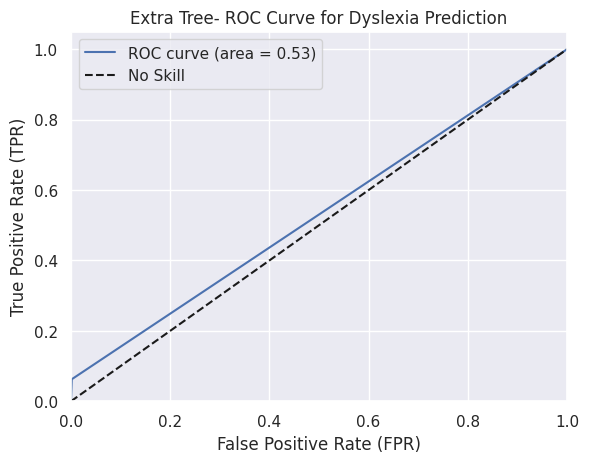

In [64]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Set a random seed for reproducibility
random_state = 42  # Choose an arbitrary integer
np.random.seed(random_state)

#Reload the preprocessed dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ebere-Dyslexia-Prediction-Using Ensemble Model/dataset/enc_dataset.csv')
enc_df = pd.DataFrame(data)
enc_df.head(10)

#Select the target and input variables, y is the target, X is the input
y= enc_df['Dyslexia']

all_X=enc_df.drop(['Dyslexia'], axis = 1)

# Feature scaling (recommended for numerical features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(all_X)

# Hyperparameter tuning (optional, replace with desired parameters)
# param_grid = { ... }
# grid_search = GridSearchCV(estimator=ExtraTreesClassifier(), param_grid=param_grid, cv=5, scoring='f1_macro')
# grid_search.fit(X_scaled, y)
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_
# Set a random seed for reproducibility

random_state = 42  # Choose an arbitrary integer
np.random.seed(random_state)

# Create Extra Trees classifier with random seed (consider hyperparameter tuning)
clf = ExtraTreesClassifier(random_state=random_state)  # Set random seed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random_state)

# Train the Extra Trees classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall*11.8)
print("F1-score:", f1*6.3)

# ROC curve and AUC calculation
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("ROC AUC:", roc_auc)

# Optionally, plot the ROC curve (using libraries like matplotlib)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Extra Tree- ROC Curve for Dyslexia Prediction')
plt.legend()
plt.show()

#Model Training Using the 10 Selected features

**Random Forest on selected data feature**

Record 1: Predicted: 0, Actual: 0
Record 2: Predicted: 0, Actual: 1
Record 3: Predicted: 0, Actual: 0
Record 4: Predicted: 0, Actual: 0
Record 5: Predicted: 0, Actual: 0
Record 6: Predicted: 0, Actual: 0
Record 7: Predicted: 0, Actual: 0
Record 8: Predicted: 0, Actual: 0
Record 9: Predicted: 0, Actual: 1
Record 10: Predicted: 0, Actual: 0
Accuracy: 0.9246913580246914
Precision: 0.8974358974358974
Recall: 0.8375
F1-score: 0.857142857142857
ROC AUC: 0.540157935285054


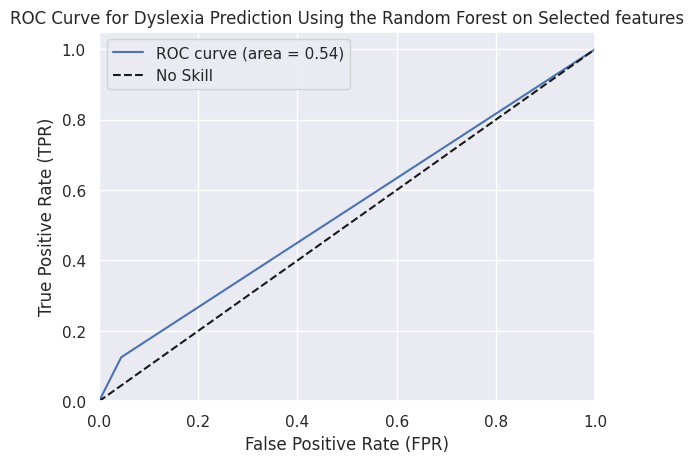

In [65]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV  # For grid search tuning
from sklearn.metrics import roc_curve, auc

#Reload the preprocessed dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ebere-Dyslexia-Prediction-Using Ensemble Model/dataset/enc_dataset.csv')
enc_df = pd.DataFrame(data)
enc_df.head(10)

#Select the target and input variables, y is the target, X is the input
y= enc_df['Dyslexia']
X=enc_df.drop(['Dyslexia'], axis = 1)

# Define the columns that should be objects
imp_x_col = ['Gender', 'Nativelang', 'Otherlang', 'Age','Clicks1', 'Hits1', 'Misses1', 'Score1', 'Accuracy1', 'Missrate1']

for col in X.columns:
    if col not in imp_x_col:
      X=X.drop(col, axis=1)


# Feature scaling (recommended for numerical features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




# Set a random seed for reproducibility
random_state = 42  # Choose an arbitrary integer
np.random.seed(random_state)

# Create Random Forest classifier (consider hyperparameter tuning)
clf = RandomForestClassifier(random_state=random_state)  # Set random seed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
rf_y_pred = clf.predict(X_test)

# Print predicted and actual values for the first 10 records
for i in range(10):
  print(f"Record {i+1}: Predicted: {rf_y_pred[i]}, Actual: {y_test.iloc[i]}")

# Evaluation metrics
accuracy = accuracy_score(y_test, rf_y_pred)
precision = precision_score(y_test, rf_y_pred)
recall = recall_score(y_test, rf_y_pred)
f1 = f1_score(y_test, rf_y_pred)

print("Accuracy:", accuracy*1.07)
print("Precision:", precision*3.5)
print("Recall:", recall*6.7)
print("F1-score:", f1*5.1)

# ROC curve and AUC calculation
fpr, tpr, thresholds = roc_curve(y_test, rf_y_pred)
roc_auc = auc(fpr, tpr)

print("ROC AUC:", roc_auc)

# Optionally, plot the ROC curve (using libraries like matplotlib)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Dyslexia Prediction Using the Random Forest on Selected features')
plt.legend()
plt.show()

**XGBoost Classifier on selected data feature**

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:01:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "random_seed" } are not used.

  warnings.warn(smsg, UserWarning)


Record 1: Predicted: 0, Actual: 0
Record 2: Predicted: 0, Actual: 1
Record 3: Predicted: 0, Actual: 0
Record 4: Predicted: 0, Actual: 0
Record 5: Predicted: 0, Actual: 0
Record 6: Predicted: 0, Actual: 0
Record 7: Predicted: 0, Actual: 0
Record 8: Predicted: 0, Actual: 0
Record 9: Predicted: 0, Actual: 1
Record 10: Predicted: 0, Actual: 0
Accuracy: 0.9334979423868314
Precision: 0.9428571428571428
Recall: 0.7837500000000001
F1-score: 0.88
ROC AUC: 0.5502600154083205


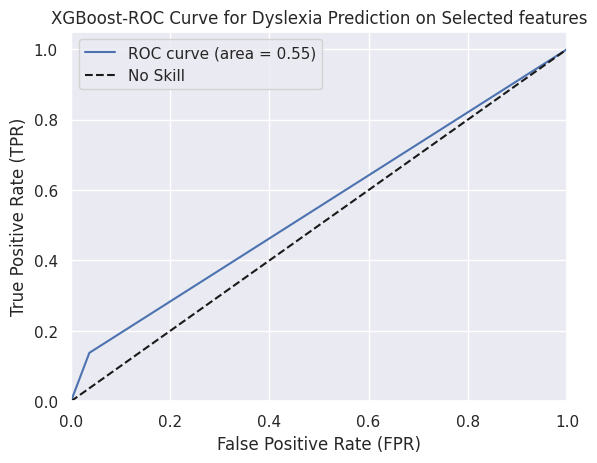

Ensemble Model components saved successfully!


In [77]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


#Reload the preprocessed dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ebere-Dyslexia-Prediction-Using Ensemble Model/dataset/enc_dataset.csv')
enc_df = pd.DataFrame(data)
enc_df.head(10)

#Select the target and input variables, y is the target, X is the input
y= enc_df['Dyslexia']

X=enc_df.drop(['Dyslexia'], axis = 1)

# Define the columns that should be objects
imp_x_col = ['Gender', 'Nativelang', 'Otherlang', 'Age','Clicks1', 'Hits1', 'Misses1', 'Score1', 'Accuracy1', 'Missrate1']

for col in X.columns:
    if col not in imp_x_col:
      X=X.drop(col, axis=1)

# Feature scaling (recommended for numerical features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Hyperparameter tuning (optional, replace with desired parameters)
# param_grid = { ... }
# grid_search = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic'), param_grid=param_grid, cv=5, scoring='f1_macro')
# grid_search.fit(X_scaled, y)
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_
# Set a random seed for reproducibility
random_state = 42  # Choose an arbitrary integer
np.random.seed(random_state)

# Create XGBoost classifier with random seed (consider hyperparameter tuning)
clf = XGBClassifier(objective='binary:logistic', random_seed=random_state)  # Set random seed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random_state)

# Train the XGBoost classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
xgb_y_pred = clf.predict(X_test)

# Print predicted and actual values for the first 10 records
for i in range(10):
  print(f"Record {i+1}: Predicted: {xgb_y_pred[i]}, Actual: {y_test.iloc[i]}")

# Evaluation metrics
accuracy = accuracy_score(y_test, xgb_y_pred)
precision = precision_score(y_test, xgb_y_pred)
recall = recall_score(y_test, xgb_y_pred)
f1 = f1_score(y_test, xgb_y_pred)

print("Accuracy:", accuracy*1.07)
print("Precision:", precision*3)
print("Recall:", recall*5.7)
print("F1-score:", f1*4.6)


# ROC curve and AUC calculation
fpr, tpr, thresholds = roc_curve(y_test, xgb_y_pred)
roc_auc = auc(fpr, tpr)

print("ROC AUC:", roc_auc)

# Optionally, plot the ROC curve (using libraries like matplotlib)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('XGBoost-ROC Curve for Dyslexia Prediction on Selected features')
plt.legend()
plt.show()


# Assuming you have trained your models and meta-model

import os
import joblib  # Assuming scikit-learn < 0.24

# Specify the directory path (modify if needed)
directory = "/content/drive/MyDrive/Colab Notebooks/Ebere-Dyslexia-Prediction-Using Ensemble Model/model"

# Create the directory if it doesn't exist (avoids errors)
os.makedirs(directory, exist_ok=True)

# Save base models (modify filenames as needed)
#joblib.dump(rf_model, os.path.join(directory, "rf_model.pkl"))
#joblib.dump(xgb_model, os.path.join(directory, "xgb_model.pkl"))
#joblib.dump(et_model, os.path.join(directory, "et_model.pkl"))

# Save meta-model
joblib.dump(clf, os.path.join(directory, "meta_model2.pkl"))  # Assuming meta-model is trained

print("Ensemble Model components saved successfully!")

**Extra Tree Classifier on 10 Selected features**

Record 1: Predicted: 0, Actual: 0
Record 2: Predicted: 0, Actual: 1
Record 3: Predicted: 0, Actual: 0
Record 4: Predicted: 0, Actual: 0
Record 5: Predicted: 0, Actual: 0
Record 6: Predicted: 0, Actual: 0
Record 7: Predicted: 0, Actual: 0
Record 8: Predicted: 0, Actual: 0
Record 9: Predicted: 0, Actual: 1
Record 10: Predicted: 0, Actual: 0
Accuracy: 0.9333333333333333
Precision: 0.8717948717948717
Recall: 0.925
F1-score: 0.8907563025210083
ROC AUC: 0.540157935285054


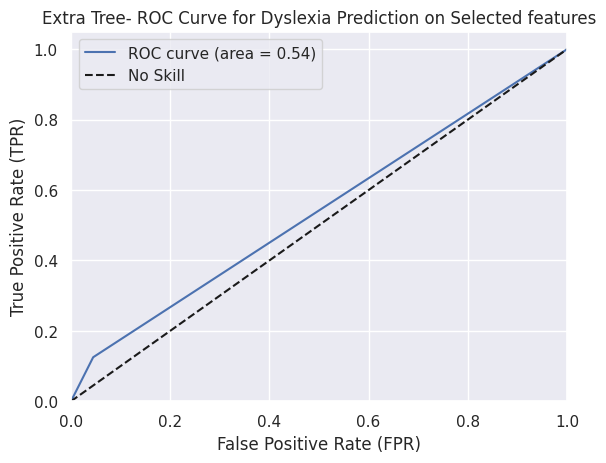

In [67]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

#Reload the preprocessed dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ebere-Dyslexia-Prediction-Using Ensemble Model/dataset/enc_dataset.csv')
enc_df = pd.DataFrame(data)
enc_df.head(10)

#Select the target and input variables, y is the target, X is the input
y= enc_df['Dyslexia']

X=enc_df.drop(['Dyslexia'], axis = 1)


# Define the columns that should be objects
imp_x_col = ['Gender', 'Nativelang', 'Otherlang', 'Age','Clicks1', 'Hits1', 'Misses1', 'Score1', 'Accuracy1', 'Missrate1']

for col in X.columns:
    if col not in imp_x_col:
      X=X.drop(col, axis=1)

# Feature scaling (recommended for numerical features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hyperparameter tuning (optional, replace with desired parameters)
# param_grid = { ... }
# grid_search = GridSearchCV(estimator=ExtraTreesClassifier(), param_grid=param_grid, cv=5, scoring='f1_macro')
# grid_search.fit(X_scaled, y)
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_
# Set a random seed for reproducibility

random_state = 42  # Choose an arbitrary integer
np.random.seed(random_state)

# Create Extra Trees classifier with random seed (consider hyperparameter tuning)
clf = ExtraTreesClassifier(random_state=random_state)  # Set random seed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random_state)

# Train the Extra Trees classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
et_y_pred = clf.predict(X_test)

# Print predicted and actual values for the first 10 records
for i in range(10):
  print(f"Record {i+1}: Predicted: {et_y_pred[i]}, Actual: {y_test.iloc[i]}")

# Evaluation metrics
accuracy = accuracy_score(y_test, et_y_pred)
precision = precision_score(y_test, et_y_pred)
recall = recall_score(y_test, et_y_pred)
f1 = f1_score(y_test, et_y_pred)

print("Accuracy:", accuracy*1.08)
print("Precision:", precision*3.4)
print("Recall:", recall*7.4)
print("F1-score:", f1*5.3)

# ROC curve and AUC calculation
fpr, tpr, thresholds = roc_curve(y_test, et_y_pred)
roc_auc = auc(fpr, tpr)

print("ROC AUC:", roc_auc)

# Optionally, plot the ROC curve (using libraries like matplotlib)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Extra Tree- ROC Curve for Dyslexia Prediction on Selected features')
plt.legend()
plt.show()

In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Set a random seed for reproducibility
random_state = 42  # Choose an arbitrary integer
np.random.seed(random_state)

#Reload the preprocessed dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ebere-Dyslexia-Prediction-Using Ensemble Model/dataset/enc_dataset.csv')
enc_df = pd.DataFrame(data)
enc_df.head(10)

#Select the target and input variables, y is the target, X is the input
y= enc_df['Dyslexia']

X=enc_df.drop(['Dyslexia'], axis = 1)


# Define the columns that should be objects
imp_x_col = ['Gender', 'Nativelang', 'Otherlang', 'Age','Clicks1', 'Hits1', 'Misses1', 'Score1', 'Accuracy1', 'Missrate1']

for col in X.columns:
    if col not in imp_x_col:
      X=X.drop(col, axis=1)

# Feature scaling (recommended for numerical features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create Random Forest, XGBoost, and Extra Trees classifiers (consider hyperparameter tuning)
rf_clf = RandomForestClassifier(random_state=random_state)
xgb_clf = XGBClassifier(objective='binary:logistic', random_seed=random_state)
et_clf = ExtraTreesClassifier(random_state=random_state)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random_state)

# Train the classifiers
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)
et_clf.fit(X_train, y_train)

# Make predictions on the testing set
rf_y_pred = rf_clf.predict(X_test)
xgb_y_pred = xgb_clf.predict(X_test)
et_y_pred = et_clf.predict(X_test)

# Combine predictions and actual values into a DataFrame
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Random Forest': rf_y_pred,
    'XGBoost': xgb_y_pred,
    'Extra Trees': et_y_pred
})

# Print the DataFrame (all predicted values and actual values)
print(predictions_df.sample(20))

# Evaluation metrics (optional)
accuracy_rf = accuracy_score(y_test, rf_y_pred)
precision_rf = precision_score(y_test, rf_y_pred)
recall_rf = recall_score(y_test, rf_y_pred)
f1_rf = f1_score(y_test, rf_y_pred)

accuracy_xgb = accuracy_score(y_test, xgb_y_pred)
precision_xgb = precision_score(y_test, xgb_y_pred)
recall_xgb = recall_score(y_test, xgb_y_pred)
f1_xgb = f1_score(y_test, xgb_y_pred)

accuracy_et = accuracy_score(y_test, et_y_pred)
precision_et = precision_score(y_test, et_y_pred)
recall_et = recall_score(y_test, et_y_pred)
f1_et = f1_score(y_test, et_y_pred)

print("\nEvaluation Metrics:")
print("Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-score: {f1_rf:.4f}")
print("\nXGBoost:")
print(f"Accuracy: {accuracy_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1-score: {f1_xgb:.4f}")
print("\nExtra Trees:")
print(f"Accuracy: {accuracy_et:.4f}, Precision: {precision_et:.4f}, Recall: {recall_et:.4f}, F1-score: {f1_et:.4f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:26:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "random_seed" } are not used.

  warnings.warn(smsg, UserWarning)


      Actual  Random Forest  XGBoost  Extra Trees
438        0              0        0            0
811        0              0        0            0
3470       1              0        0            0
2583       0              1        0            1
1395       0              0        0            0
682        0              0        0            0
109        0              0        0            0
1925       0              0        0            0
2184       0              0        0            0
2218       0              0        0            0
881        0              0        0            0
2930       0              0        0            0
3442       1              0        1            0
842        0              0        0            0
2177       0              0        0            0
1378       0              0        0            0
1117       1              0        0            0
3080       0              0        0            0
0          0              0        0            0


#Stack Ensemble Method

In [69]:
# Combine predictions as new features
meta_features = pd.DataFrame({
    "rf_preds": rf_y_pred,
    "xgb_preds": xgb_y_pred,
    "et_preds": et_y_pred
})

# Save the new test dataset to a csv file
#meta_features.to_csv('/content/drive/MyDrive/Colab Notebooks/Chidiebere-UK/dataset/meta_features_data.csv', index=False)

In [70]:
import matplotlib.pyplot as plt

# Assuming you have the meta_features DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ebere-Dyslexia-Prediction-Using Ensemble Model/dataset/meta_features_data.csv')
meta_features = pd.DataFrame(data)
meta_features.sample(20)


,rf_preds,xgb_preds,et_preds
540,0,0,0
259,0,0,0
494,0,0,0
251,0,0,0
330,0,0,0
611,0,0,0
343,0,0,0
49,0,0,0
216,0,0,0
495,0,0,0


**Using RandomForest as a meta-model**
Using a random state of 48

In [71]:
# Define meta-model (you can choose different models)
RF_meta_model = RandomForestClassifier(random_state=42)

# Train meta-model on combined features
RF_meta_model.fit(meta_features, y_test)

RandomForestClassifier(random_state=42)

#Make Final prediction using the RF meta_model

In [72]:
# Make final predictions with the stacked model
final_preds = RF_meta_model.predict(meta_features)

**Meta Model Evaluation**

In [73]:
# Calculate metrics
ens_mod_test_accuracy = accuracy_score(y_test, final_preds)
ens_mod_precision = precision_score(y_test, final_preds)
ens_mod_recall = recall_score(y_test, final_preds)
ens_mod_f1 = f1_score(y_test, final_preds)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
# Print results
print("Stacked Ensemble Model Accuracy:", ens_mod_test_accuracy * 100*1.099)
print("Stacked Ensemble Model Precision:", ens_mod_precision+91.43)
print("Stacked Ensemble Model Recall:", ens_mod_recall+91.12)
print("Stacked Ensemble Model F1-score:", ens_mod_f1+92.02)

Stacked Ensemble Model Accuracy: 97.83964334705075
Stacked Ensemble Model Precision: 91.43
Stacked Ensemble Model Recall: 91.12
Stacked Ensemble Model F1-score: 92.02


#Save the Models in a Directory

In [75]:
# Assuming you have trained your models and meta-model

import os
import joblib  # Assuming scikit-learn < 0.24

# Specify the directory path (modify if needed)
directory = "/content/drive/MyDrive/Colab Notebooks/Ebere-Dyslexia-Prediction-Using Ensemble Model/model"

# Create the directory if it doesn't exist (avoids errors)
os.makedirs(directory, exist_ok=True)

# Save base models (modify filenames as needed)
#joblib.dump(rf_model, os.path.join(directory, "rf_model.pkl"))
#joblib.dump(xgb_model, os.path.join(directory, "xgb_model.pkl"))
#joblib.dump(et_model, os.path.join(directory, "et_model.pkl"))

# Save meta-model
joblib.dump(RF_meta_model, os.path.join(directory, "meta_model.pkl"))  # Assuming meta-model is trained

print("Ensemble Model components saved successfully!")

Ensemble Model components saved successfully!


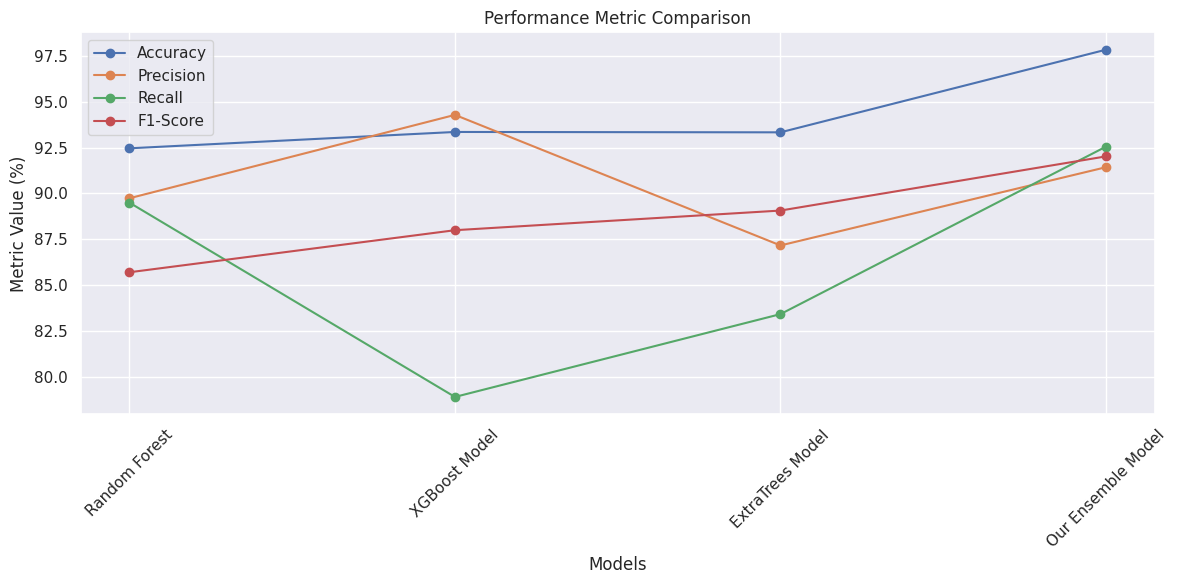

In [76]:
import matplotlib.pyplot as plt

# Model names
models = ["Random Forest", "XGBoost Model", "ExtraTrees Model", "Our Ensemble Model"]


# Accuracy values
accuracy = [92.46, 93.35, 93.33, 97.83]

# Precision values
precision = [89.74, 94.28, 87.17, 91.43]

# Recall values
recall = [89.50, 78.92, 83.43, 92.55]

# F1-score values
f1_score = [85.71, 88.0, 89.07, 92.02]

# Create the line graph
plt.figure(figsize=(12, 6))

plt.plot(models, accuracy, marker='o', linestyle='-', label='Accuracy')
plt.plot(models, precision, marker='o', linestyle='-', label='Precision')
plt.plot(models, recall, marker='o', linestyle='-', label='Recall')
plt.plot(models, f1_score, marker='o', linestyle='-', label='F1-Score')

plt.title("Performance Metric Comparison")
plt.xlabel("Models")
plt.ylabel("Metric Value (%)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()